In [444]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import math

In [445]:
peg = 100 #cents
integral = 0
e_prev = 0
default_borrow_rate = 5

In [446]:
# PID function

def PID(Kp, Ki, Kd, setpoint, current):
    global integral, e_prev
    duration = 1
    offset = 5
    
    # calculations
    e = setpoint - current
    P = Kp*e
    integral = integral + Ki*e*duration
    D = Kd*(e - e_prev)/duration
    borrow_rate = offset + P + integral + D

    # updates
    e_prev = e

    return e, borrow_rate

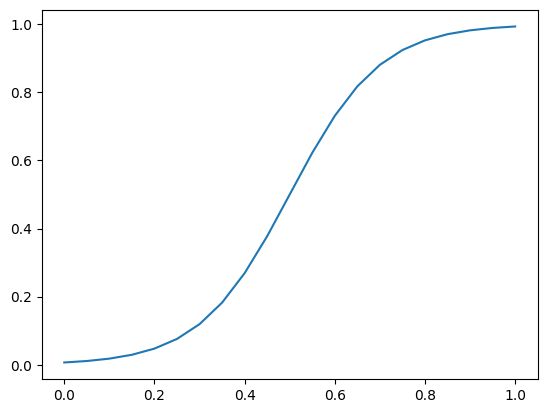

In [447]:
# logistic function

def logistic(x):
    return 1/(1+math.e**(10*(0.5-x)))

def plot_logistic():
    y = []
    x = np.arange(0,1.001,0.05)
    for i in range(21):
        y.append(logistic(x[i]))
    plt.plot(x, y)

plot_logistic()

In [448]:
num_users = 100
rate_weight = 1
user_wallet = np.random.uniform(0, 1000, num_users)
user_spent = np.random.choice([True, False], num_users)
initial_supply = 0

def calculate_supply():
    supply = 0
    for i in range(num_users):
        if user_spent[i]:
            supply = supply + user_wallet[i]
    return supply

initial_supply = calculate_supply()
current_supply = initial_supply.copy()
        
def user_interaction(current, borrow_rate, event):
    global user_spent
    delta = 0
    user_instinct = np.random.normal(loc=(default_borrow_rate - borrow_rate)*rate_weight + peg + event, scale = 4, size = num_users)
    for i in range(num_users):
        if user_instinct[i] >= current:
            if not user_spent[i]:
                user_spent[i] = True
                delta += user_wallet[i]
        else:
            if user_spent[i]:
                user_spent[i] = False
                delta -= user_wallet[i]
    return delta

    # print(user_instinct)

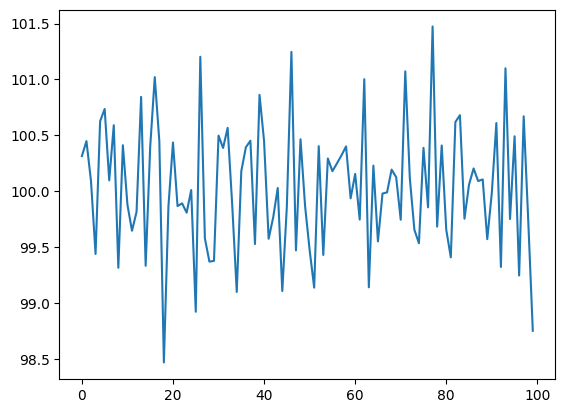

In [449]:
def calculate_current_value(current, delta):
    delta_factor = 1/(100*num_users)
    time_factor = 1/1000
    depreciate_value = current - time_factor
    new_value = depreciate_value + delta*delta_factor
    return new_value

def defi_process(current, borrow_rate):
    global current_supply
    event = np.random.normal()
    delta = user_interaction(current, borrow_rate, event)
    return calculate_current_value(current, delta)

def simulate():
    current = peg
    epochs = 100
    exchange_rates = []
    errors = []
    for i in range(epochs):
        e, borrow_rate = PID(0.5,0.1,0.01, peg, current)
        current = defi_process(current, borrow_rate)
        exchange_rates.append(current)
        errors.append(e)
    time = np.arange(epochs)
    plt.plot(time, exchange_rates)
    plt.show()

simulate()